In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import cv2
import numpy as np
import numpy as np

import pandas as pd
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,Reshape,LeakyReLU,Dropout
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D,UpSampling2D

In [3]:
ab=np.load("E:\sdbsdcnbnbsdn dsc\mnk.npy")
gray=np.load("E:\sdbsdcnbnbsdn dsc\gray_scale.npy")

In [4]:
def batch_prep(gray_img,batch_size=100):
  img=np.zeros((batch_size,224,224,3))
  for i in range(0,3):
    img[:batch_size,:,:,i]=gray_img[:batch_size]
    return img
img_in=batch_prep(gray[29],batch_size=300)

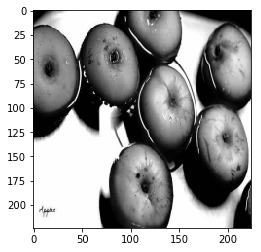

In [5]:
plt.imshow(gray[29],cmap=plt.cm.gray)

In [5]:
def get_rbg(gray_imgs,ab_imgs,n=10):
  img1=np.zeros((n,224,224,3))
  img1[:,:,:,0]=gray_imgs[0:n:]
  img1[:,:,:,1:]=ab_imgs[0:n]
  img1=img1.astype(np.uint8)
  imgs=[]
  for i in range(0,n):
    imgs.append(cv2.cvtColor(img1[i],cv2.COLOR_LAB2RGB))
  imgs=np.array(imgs)
  return imgs

In [6]:
img_out=get_rbg(gray_imgs=gray,ab_imgs=ab,n=300)

In [7]:
model=Sequential()
model.add(Conv2D(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=-0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))
model.add(Conv2D(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=-0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model.add(Conv2D(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=-0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))
model.add(Conv2D(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=-0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(UpSampling2D((2,2)))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))
model.add(Conv2D(strides=1,kernel_size=3,filters=12,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(Conv2DTranspose(strides=1,kernel_size=3,filters=3,use_bias=True,bias_initializer=tf.keras.initializers.random_uniform(minval=-0.05,maxval=0.05),padding="valid",activation=tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),loss='mape',metrics=tf.keras.metrics.Accuracy())

In [9]:
model.fit(img_in,img_out,epochs=10,batch_size=16)

Epoch 1/10
19/19 [==============================] - 61s 3s/step - loss: 3105345.8188 - accuracy: 0.0689
Epoch 2/10
19/19 [==============================] - 58s 3s/step - loss: 20512.7162 - accuracy: 0.0680
Epoch 3/10
19/19 [==============================] - 62s 3s/step - loss: 10966.6842 - accuracy: 0.0595
Epoch 4/10
19/19 [==============================] - 56s 3s/step - loss: 4331.1798 - accuracy: 0.0725
Epoch 5/10
19/19 [==============================] - 55s 3s/step - loss: 1587.5182 - accuracy: 0.0691
Epoch 6/10
19/19 [==============================] - 57s 3s/step - loss: 466.6917 - accuracy: 0.0634
Epoch 7/10
19/19 [==============================] - 58s 3s/step - loss: 291.6773 - accuracy: 0.0720
Epoch 8/10
19/19 [==============================] - 58s 3s/step - loss: 181.0560 - accuracy: 0.0621
Epoch 9/10
19/19 [==============================] - 58s 3s/step - loss: 212.2696 - accuracy: 0.0700
Epoch 10/10
19/19 [==============================] - 57s 3s/step - loss: 196.2555 - accura

In [10]:
prediction =model.predict(img_in)

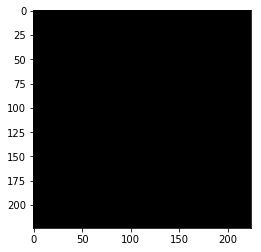

In [11]:
plt.imshow(prediction[29])

In [12]:
model.save("E:\sdbsdcnbnbsdn dsc\model.h")

INFO:tensorflow:Assets written to: E:\sdbsdcnbnbsdn dsc\model.h\assets


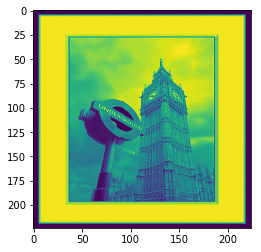

In [13]:
for i in range(9):
    plt.imshow(gray[i])